In [1]:
import matplotlib.pyplot as plt
import numpy as np

import achiralqw as aqw

from achiralqw.graph import QWGraph, QWGraphBuilder as qwgb
from achiralqw.plotter import plot_qwgraph
from achiralqw.collection import CachedQWGraphCollection

from achiralqw.article import * 

[  5   6   7   8   9  10  11  12  13  14  15  16  18  19  20  21  23  24
  26  27  29  31  33  35  37  39  42  45  48  51  54  57  61  65  69  73
  78  83  88  94 100]
C3 chain progression: Starting pool creation with 24 process


100%|██████████| 41/41 [00:00<00:00, 398.55it/s]


h(C3^3) : Starting pool evaluation with 24 process
Data Setup


41it [00:00, 870.58it/s]


Evaluation


100%|██████████| 41/41 [00:01<00:00, 23.10it/s]


C4 chain progression: Starting pool creation with 24 process


100%|██████████| 41/41 [00:00<00:00, 482.56it/s]

h(C4^1) : Starting pool evaluation with 24 process


Data Setup


41it [00:00, 1180.46it/s]


Evaluation


100%|██████████| 41/41 [00:01<00:00, 31.89it/s]


DiC4 chain progression: Starting pool creation with 24 process


100%|██████████| 41/41 [00:00<00:00, 141.17it/s]


h(DiC4^3) : Starting pool evaluation with 24 process
Data Setup


41it [00:00, 511.21it/s]


Evaluation


100%|██████████| 41/41 [00:03<00:00, 13.35it/s]


P progression: Starting pool creation with 24 process


100%|██████████| 41/41 [00:00<00:00, 1191.12it/s]

P5 : Starting pool evaluation with 24 process


Data Setup


41it [00:00, 2031.38it/s]


Evaluation


100%|██████████| 41/41 [00:02<00:00, 15.01it/s]


(<Figure size 432x360 with 1 Axes>, <AxesSubplot:>)

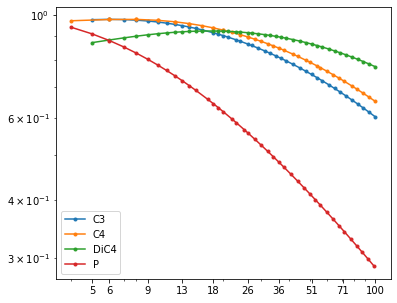

In [3]:
#log log progression
an = Analyzer(mode = "first")
plot_chain_progression_multi_loglog(bounds = (5,100), points = 50, target = "p", analyzer = an, fast = True)

6.283185307179586
C4 chain progression: Starting pool creation with 24 process


100%|██████████| 48/48 [00:00<00:00, 308.52it/s]


h(C4^2) : Starting pool evaluation with 24 process
Data Setup


48it [00:00, 416.12it/s]


Evaluation


100%|██████████| 48/48 [00:02<00:00, 22.20it/s]


(0.4, 1)

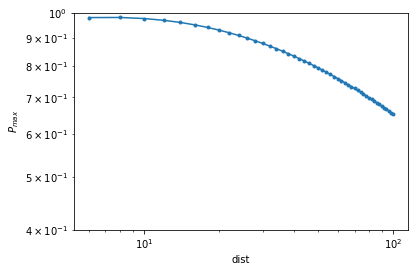

In [12]:
unit = QWGraphBuilder.Ring(4)
fast_analyzer_C3 =     Analyzer( solver_mode= "eigen", mode = "first", opt_mode = "fix", diag = True, gr = QWGraphBuilder.Ring(4))
fast_analyzer_C3.set_fix_phi( opt_mode = "smart")
print(fast_analyzer_C3.get_fix_phi())
ax = plot_chain_progression(unit, bounds = (5,100), step = 5, analyzer = fast_analyzer_C3)
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_ylim(top = 1, bottom = .4)

[ 300  307  315  322  330  339  347  356  365  374  383  393  402  412
  423  433  444  455  466  478  490  502  515  527  541  554  568  582
  596  611  626  642  658  674  691  708  726  744  763  782  801  821
  841  862  884  906  928  952  975 1000]
C3 chain progression: Starting pool creation with 24 process


 32%|███▏      | 16/50 [00:07<00:16,  2.06it/s]


KeyboardInterrupt: 

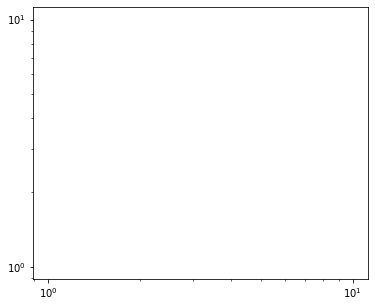

In [3]:
#log log progression
an = Analyzer(mode = "first")
plot_chain_progression_multi_loglog(bounds = (300,1000), points = 50, target = "p", analyzer = an, fast = True)

In [ ]:
#Asymptotics for C4 chains

unit = QWGraphBuilder.Ring(4)
an = Analyzer(mode = "first")
an.set_opt_mode("fix")
an.set_diag(True)
an.set_gr(unit)
an.set_fix_phi( an.optimum_phase_smart()[0])

cb = CollectionBuilder()


In [ ]:
#Asymptotics model for C4 chain

c4model_collection = cb.log_chain_progression(unit, bounds = (4,500), points = 50, analyzer = an)

poly_params = c4model_collection.transport_prob_model() 
custom_params = c4model_collection.transport_prob_model(mode = "custom") 

In [ ]:
x, data = c4model_collection.get_data()

In [ ]:
fig, axx = plt.subplots(1,2, figsize = (10,5))

axx[0].plot(x,data, marker = ".", label = "data")
axx[1].plot(x,data, marker = ".", label = "data")

axx[0].set_xscale("log")
axx[0].set_yscale("log")
axx[0].set_ylim(.01,1)

axx[1].set_ylim(0,1)
axx[1].set_xscale("log")

sample = np.geomspace(4, 500, 100)

def custom_model(x,a,b,c):
    return np.exp(a*np.log(x) + b + c/np.log(x))

def poly_model(x,a,b,c):
    return np.exp(a*(np.log(x)**2) + b*np.log(x) + c)

print(custom_model(10, *custom_params))
print(poly_model(10, *poly_params))

custom_data = [custom_model(x, *custom_params) for x in sample]
axx[0].plot(sample, custom_data, label = "1/x model")
axx[1].plot(sample, custom_data, label = "1/x model")

poly_data = [poly_model(x, *poly_params) for x in sample]
axx[0].plot(sample, poly_data, label = "deg2 poly")
axx[1].plot(sample, poly_data, label = "deg2 poly")

axx[0].legend()
axx[1].legend()


In [3]:
my_c = cb.log_chain_progression(unit, bounds = (300,1000), points = 20, analyzer = an)
m,q = my_c.transport_prob_loglog_lm()

h(C4^149) collection: Starting pool evaluation with 16 process
Data Setup


20it [00:30,  1.52s/it]


Evaluation


100%|██████████| 20/20 [17:19<00:00, 51.96s/it]


m:  -0.4981327880788796  +-  0.0030283330964720146
q:  1.995253645911972  +-  0.019123151723843216
r:  -0.9996675373090819


In [2]:
#Asymptotics for C3 chain

unit = QWGraphBuilder.Ring(3)
an = Analyzer(mode = "first")
an.set_opt_mode("fix")
an.set_diag(True)
an.set_gr(unit)
an.set_fix_phi( an.optimum_phase_smart()[0])
print(an.optimum_phase_smart()[0])
print(an.performance_diag(an.optimum_phase_smart()[0]),an.opt_mode, an.diag)

cb = CollectionBuilder()

1.5707963267948966
1.0 fix True


In [11]:
#Asymptotics model for C3 chain

c3model_collection = cb.log_chain_progression(unit, bounds = (4,500), points = 50, analyzer = an)

poly_params = c3model_collection.transport_prob_model() 
custom_params = c3model_collection.transport_prob_model(mode = "custom") 

C3 chain progression: Starting pool creation with 16 process


100%|██████████| 46/46 [00:02<00:00, 21.06it/s] 


h(C3^2) collection: Starting pool evaluation with 16 process
Data Setup


46it [00:09,  4.85it/s] 


Evaluation


100%|██████████| 46/46 [00:19<00:00,  2.32it/s]


ax^2:  -0.0619148909963003
bx:  0.22367287108866332
c:  -0.21878137540972686
h(C3^2) collection: Starting pool evaluation with 16 process
Data Setup


46it [00:09,  4.82it/s]


Evaluation


100%|██████████| 46/46 [00:19<00:00,  2.40it/s]


ax:  -0.4321851956827108  +-  0.00013435517150128622
b:  1.8714223879261374  +-  0.006447619482231326
c*1/x:  -1.9709540863476147  +-  0.014891016016017092


In [12]:
x, data = c3model_collection.get_data()

h(C3^2) collection: Starting pool evaluation with 16 process
Data Setup


46it [00:09,  4.99it/s]


Evaluation


100%|██████████| 46/46 [00:19<00:00,  2.40it/s]


1.0205122581984027
0.9684852748612239


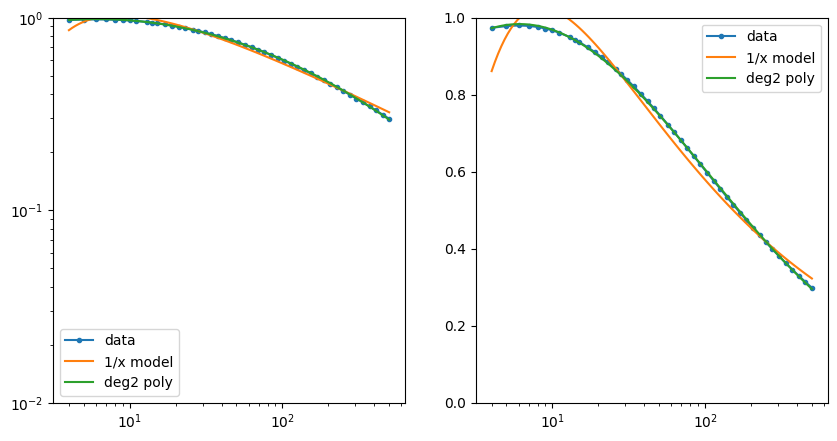

In [13]:
fig, axx = plt.subplots(1,2, figsize = (10,5))

axx[0].plot(x,data,  marker = ".",label = "data")
axx[1].plot(x,data,  marker = ".",label = "data")

axx[0].set_xscale("log")
axx[0].set_yscale("log")
axx[0].set_ylim(.01,1)

axx[1].set_ylim(0,1)
axx[1].set_xscale("log")

sample = np.geomspace(4, 500, 100)

def custom_model(x,a,b,c):
    return np.exp(a*np.log(x) + b + c/np.log(x))

def poly_model(x,a,b,c):
    return np.exp(a*(np.log(x)**2) + b*np.log(x) + c)

print(custom_model(10, *custom_params))
print(poly_model(10, *poly_params))

custom_data = [custom_model(x, *custom_params) for x in sample]
axx[0].plot(sample, custom_data, label = "1/x model")
axx[1].plot(sample, custom_data, label = "1/x model")

poly_data = [poly_model(x, *poly_params) for x in sample]
axx[0].plot(sample, poly_data, label = "deg2 poly")
axx[1].plot(sample, poly_data, label = "deg2 poly")

axx[0].legend()
axx[1].legend()


In [4]:
c3collection = cb.log_chain_progression(unit, bounds = (300,1000), points = 20, analyzer = an)
m,q = c3collection.transport_prob_loglog_lm()

C3 chain progression: Starting pool creation with 16 process


100%|██████████| 20/20 [00:12<00:00,  1.63it/s]

h(C3^298) collection: Starting pool evaluation with 16 process


Data Setup


20it [01:05,  3.28s/it]


Evaluation


100%|██████████| 20/20 [01:57<00:00,  5.89s/it]


m:  -0.5154619216567503  +-  0.002782598774747101
q:  1.9895880419483618  +-  0.017573094189750334
r:  -0.9997378319895491


In [2]:
#Asymptotics for kite chain

unit = QWGraphBuilder.SquareCut()
an = Analyzer(mode = "first")
an.set_opt_mode("fix")
an.set_diag(True)
an.set_gr(unit)
an.set_fix_phi( an.optimum_phase_smart()[0])

cb = CollectionBuilder()


In [7]:
#Asymptotics model for kyte chain

kitemodel_collection = cb.log_chain_progression(unit, bounds = (4,500), points = 50, analyzer = an)

poly_params = kitemodel_collection.transport_prob_model() 
custom_params = kitemodel_collection.transport_prob_model(mode = "custom") 

DiC4 chain progression: Starting pool creation with 16 process


100%|██████████| 46/46 [00:06<00:00,  7.31it/s] 

h(DiC4^2) collection: Starting pool evaluation with 16 process


Data Setup


46it [00:29,  1.58it/s]


Evaluation


100%|██████████| 46/46 [00:43<00:00,  1.05it/s]


ax^2:  -0.05666246078807699
bx:  0.3140660093145328
c:  -0.5059936023740591
h(DiC4^2) collection: Starting pool evaluation with 16 process
Data Setup


46it [00:28,  1.64it/s]


Evaluation


100%|██████████| 46/46 [00:42<00:00,  1.09it/s]


ax:  -0.28083459335343836  +-  0.00016046804390728022
b:  1.368000668835859  +-  0.007700759630047324
c*1/x:  -1.7429335191508482  +-  0.017785189584653915


In [8]:
x, data = kitemodel_collection.get_data()

h(DiC4^2) collection: Starting pool evaluation with 16 process
Data Setup


46it [00:25,  1.79it/s]


Evaluation


100%|██████████| 46/46 [00:44<00:00,  1.04it/s]


0.9650346330576485
0.9201224822705769


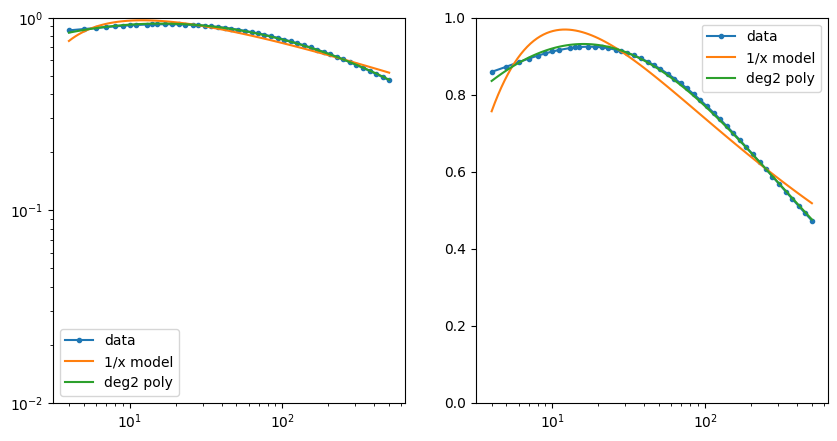

In [9]:
fig, axx = plt.subplots(1,2, figsize = (10,5))

axx[0].plot(x,data, marker = ".", label = "data")
axx[1].plot(x,data, marker = ".", label = "data")

axx[0].set_xscale("log")
axx[0].set_yscale("log")
axx[0].set_ylim(.01,1)

axx[1].set_ylim(0,1)
axx[1].set_xscale("log")

sample = np.geomspace(4, 500, 100)

def custom_model(x,a,b,c):
    return np.exp(a*np.log(x) + b + c/np.log(x))

def poly_model(x,a,b,c):
    return np.exp(a*(np.log(x)**2) + b*np.log(x) + c)

print(custom_model(10, *custom_params))
print(poly_model(10, *poly_params))

custom_data = [custom_model(x, *custom_params) for x in sample]
axx[0].plot(sample, custom_data, label = "1/x model")
axx[1].plot(sample, custom_data, label = "1/x model")

poly_data = [poly_model(x, *poly_params) for x in sample]
axx[0].plot(sample, poly_data, label = "deg2 poly")
axx[1].plot(sample, poly_data, label = "deg2 poly")

axx[0].legend()
axx[1].legend()

In [3]:
kiteCollection = cb.log_chain_progression(unit, bounds = (300,1000), points = 20, analyzer = an)
m,q = kiteCollection.transport_prob_loglog_lm()

DiC4 chain progression: Starting pool creation with 16 process


100%|██████████| 20/20 [00:26<00:00,  1.34s/it]

h(DiC4^298) collection: Starting pool evaluation with 16 process


Data Setup


20it [03:55, 11.80s/it]


Evaluation


 30%|███       | 6/20 [00:56<02:07,  9.12s/it]

: 

: 

In [3]:
cb = CollectionBuilder()
an = Analyzer(mode = "first")

create_line = qwgb.Line
line_collection = CachedQWGraphCollection(create_line, filename = "P_first_fast")


selection = np.arange(700,900)
line_collection.evaluate(selection)
line_param = line_collection.transport_prob_loglog_lm( [ int(x) for x in np.linspace(400,500,20)])

m:  -0.6260853829144849  +-  0.00018878356268249441
q:  1.6772016118938713  +-  ???
r:  -0.999999181717614


In [4]:
selection = np.arange(5,50)
line_collection.evaluate(selection)

line_collection.offload()

In [6]:
geom_select = [ int(x) for x in np.arange(5,50)]

line_collection.offload_data(select = geom_select)

In [5]:
    def C3_chain(id):
        return QWGraphBuilder.Ring(3).chain(id)
    def C4_chain(id):
        return QWGraphBuilder.Ring(4).chain(id)
    def SC_chain(id):
        return  QWGraphBuilder.SquareCut().chain(id)

    cached_C3   = CachedQWGraphCollection( create_func = C3_chain,      filename = "C3_chain_first_fast")
    cached_C4   = CachedQWGraphCollection( create_func = C4_chain,      filename = "C4_chain_first_fast")
    cached_DiC   = CachedQWGraphCollection( create_func = SC_chain,     filename = "DiC4_chain_first_fast")

    selection = np.arange(500, 700)

In [6]:
    cached_C3.evaluate(selection)
    cached_C4.evaluate(selection)
    cached_DiC.evaluate(selection)

C3_chain_first_fast : Starting pool evaluation with 24 process
Data Setup


200it [00:33,  6.01it/s]


Evaluation


100%|██████████| 200/200 [07:55<00:00,  2.38s/it]


C4_chain_first_fast : Starting pool evaluation with 24 process
Data Setup


200it [01:27,  2.28it/s]


Evaluation


  2%|▏         | 4/200 [04:32<3:42:29, 68.11s/it]  


KeyboardInterrupt: 

In [ ]:
    cached_C3.offload()
    cached_C4.offload()
    cached_DiC.offload()

In [3]:
    base_analyzer =  Analyzer( solver_mode= "eigen", mode = "first", diag = False)
    
    def C4_chain(id):
        return QWGraphBuilder.Ring(4).chain(id)
    
    fast_analyzer_C4 =     Analyzer( solver_mode= "eigen", mode = "first", opt_mode = "fix", diag = True, gr = QWGraphBuilder.Ring(4))
    fast_analyzer_C4.set_fix_phi( opt_mode = "smart")

    cached_C4   = CachedQWGraphCollection( create_func = C4_chain,      filename = "C4_chain_first_fast",   analyzer = fast_analyzer_C4)

    selection = np.arange(2, 200)

    cached_C4.evaluate(selection)

    cached_C4.offload()
